In [48]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

In [50]:
dataset_number = 2

train = pd.read_csv(f'data/preproc_data/train_{dataset_number}.csv')
test = pd.read_csv(f'data/preproc_data/test_{dataset_number}.csv')

In [51]:
X_train = train.drop(columns='Survived')
y_train = pd.DataFrame(train['Survived'])

X_train.head()

,Unnamed: 0,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Single,SmallF,MedF,LargeF
0,0,1,3,1,22.0,1.981001,0,0,2,0,1,0,0
1,1,2,1,0,38.0,4.266662,3,1,1,0,1,0,0
2,2,3,3,0,26.0,2.070022,0,0,1,1,0,0,0
3,3,4,1,0,35.0,3.972177,3,0,1,0,1,0,0
4,4,5,3,1,35.0,2.085672,0,0,2,1,0,0,0


In [52]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'bootstrap': [True, False]
}

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((704, 13), (177, 13), (704, 1), (177, 1))

In [54]:
y_train = y_train.values.ravel()

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((704, 13), (177, 13), (704,), (177, 1))

In [55]:
rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 3 folds for each of 1120 candidates, totalling 3360 fits


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_sam

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

y_train_int = y_train.astype(int)
majority_class = np.bincount(y_train_int).argmax()
y_pred_baseline = np.full_like(y_test, fill_value=majority_class)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.59


array([[92, 13],
       [22, 52]])

,precision,recall,f1-score,support
0.0,0.81,0.88,0.84,105.0
1.0,0.80,0.70,0.75,74.0
accuracy,0.80,0.80,0.80,0.8
macro avg,0.80,0.79,0.79,179.0
weighted avg,0.80,0.80,0.80,179.0


"Best Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}"

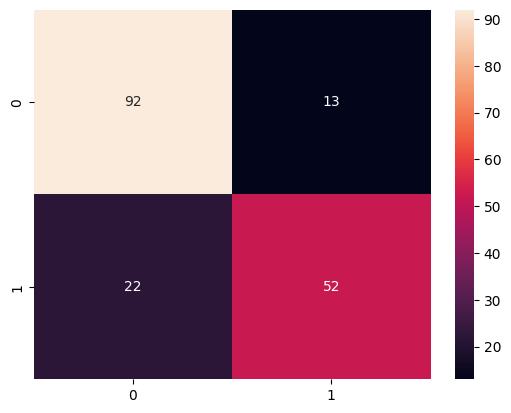

In [ ]:
display(heatmap = sns.heatmap(conf_matrix, annot=True))
display(report_df)
display(f'Best Params: {best_params}')

# Results

In [ ]:
display(f'The Random Forest Classifier correctly identifies {conf_matrix[0][0]}/{conf_matrix[0][0]+conf_matrix[0][1]} of passengers who perished, while correctly identifying {conf_matrix[1][1]}/{conf_matrix[1][0]+conf_matrix[1][1]} passengers that survived.')

'The Random Forest Classifier correctly identifies 92/105 of passengers who perished, while correctly identifying 52/74 passengers that survived.'

In [ ]:
best_rf_clf = grid_search.best_estimator_
importances = best_rf_clf.feature_importances_

feature_names = X_train.columns  # Assuming X is your DataFrame containing features

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance (descending order)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features (adjust as needed)
print("Top 10 Most Important Features:")
print(feature_importances.head(10))

Top 10 Most Important Features:
       Feature  Importance
9     Sex_male    0.218741
8   Sex_female    0.203723
6         Fare    0.143256
3          Age    0.106587
2       Pclass    0.097727
0   Unnamed: 0    0.077813
1  PassengerId    0.074456
4        SibSp    0.034831
5        Parch    0.021477
7     Embarked    0.021388


# Make Predictions

In [ ]:
predictions = best_rf_clf.predict(test)
predictions_int = predictions.astype(int)

# Create Submission File

In [ ]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions_int
})

# Save the submission DataFrame to a CSV file
submission.to_csv(f'submissions/RF_train_test_data_{dataset_number}.csv', index=False)
display("Submission file generated successfully.")

'Submission file generated successfully.'